## Split wavs to source level, append to title source, elevation, azimuth

In [5]:
# from pydub import AudioSegment
# import os
# import pandas as pd

# # Input
# annotations = pd.read_csv("D:\\units\\PML\\project\\metadata_dev\\meta_of_meta.csv")

# for i in range(0,len(annotations)):
#     sound = AudioSegment.from_wav(os.getcwd() + '\\mic_dev\\' + annotations.iloc[i, 0] + '.wav')
#     StrtTime = annotations.iloc[i, 2]*1000
#     EndTime = annotations.iloc[i, 3]*1000
#     # Opening file and extracting portion of it
#     extract = sound[StrtTime:EndTime]
#     # Saving file in required location
#     extract.export("D:\\units\\PML\\project\\mic_dev_splits\\" + annotations.iloc[i, 1] + "_" + str(annotations.iloc[i, 5]) + "_" + str(annotations.iloc[i, 6]) + "_" +  str(i) + ".wav", format="wav")

In [6]:
!pip3 install -U pip

In [7]:
!pip3 install scikit-image

^C


In [ ]:
import skimage
print(skimage.__version__)

0.19.3


In [29]:
import os
import numpy as np 
import matplotlib.pyplot as plt 

from pydub import AudioSegment
import wave

import librosa
import librosa.display

import skimage.io 

from numpy import genfromtxt

import pandas as pd




## Data Exploration

Baic info on audios, checking uniformity on sample_rate

In [ ]:
# Load files
audio_segment_1 = AudioSegment.from_file("D:\\units\\PML\\project\\mic_dev_splits\\clearthroat_10_20_36.wav")
audio_segment_2 = AudioSegment.from_file("D:\\units\\PML\\project\\mic_dev_splits\\keyboard_0_100_63.wav")
audio_segment_3 = AudioSegment.from_file("D:\\units\\PML\\project\\mic_dev_splits\\phone_-40_-30_27.wav")

audio_segments = [audio_segment_1, audio_segment_2, audio_segment_3]

# Print attributes
for audio_segment in audio_segments:
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    print(f"Frame count: {audio_segment.frame_count()}")
    print(f"Intensity: {audio_segment.dBFS}")

Plotting different amplitudes

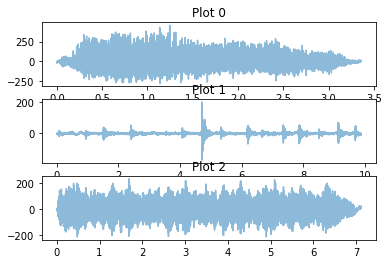

In [ ]:
# Open wav file and read frames as bytes
sf_filewave_1 = wave.open('D:\\units\\PML\\project\\mic_dev_splits\\clearthroat_10_20_36.wav', 'r')
sf_filewave_2 = wave.open('D:\\units\\PML\\project\\mic_dev_splits\\keyboard_0_100_63.wav', 'r')
sf_filewave_3 = wave.open('D:\\units\\PML\\project\\mic_dev_splits\\phone_-40_-30_27.wav', 'r')

sf_filewaves = [sf_filewave_1, sf_filewave_2, sf_filewave_3]

# Set up plot
f, axs = plt.subplots(3)
# Setup the title and axis titles
counter = 0
for sf_filewave in sf_filewaves:
    signal_sf = sf_filewave.readframes(-1)
    # Convert audio bytes to integers
    soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
    # Get the sound wave frame rate
    framerate_sf = sf_filewave.getframerate()
    # Find the sound wave timestamps
    time_sf = np.linspace(start=0,
                        stop=len(soundwave_sf)/framerate_sf,
                        num=len(soundwave_sf))
    ax = axs[counter]
    # Add the audio data to the plot
    ax.plot(time_sf, soundwave_sf, label='Sound', alpha=0.5)
    ax.set_title(f'Plot {counter}')
    counter = counter + 1

plt.show()

## Feature extraction 

### Images

Going with the spectrogram - visual representation of the spectrum of frequencies of a signal as it varies with time - and decided to work with the images.

In [ ]:
def wav_to_spectrogram():
    for filename in os.listdir(os.getcwd() + '/mic_dev_splits/'):
        if filename.endswith(".wav"): 
            x, sr = librosa.load(os.getcwd() + '/mic_dev_splits/' + filename)
            x_1k = librosa.resample(x, orig_sr=sr, target_sr=1000)
            # Spectrogram of frequency
            X = librosa.stft(x_1k)
            Xdb = librosa.amplitude_to_db(abs(X))
            plt.figure(figsize=(15, 3))
            librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='gray_r')
            #plt.colorbar()
            plt.axis('off')
            plt.savefig(os.getcwd() + '/mic_dev_splits_imgs_1k/' + filename[0:-4] + '.png')
        else:
            continue

wav_to_spectrogram()

Going with Mel-Frequency Cepstral Coefficients (MFCCs) which is a representation of the short-term power spectrum of a sound, based on some transformation in a Mel-scale

In [ ]:
def wav_to_mel():
    for filename in os.listdir(os.getcwd() + '/mic_dev_splits/'):
        if filename.endswith(".wav"): 
            x, sr = librosa.load(os.getcwd() + '/mic_dev_splits/' + filename)
            x_1k = librosa.resample(x, orig_sr=sr, target_sr=1000)
            mfccs = librosa.feature.mfcc(x, sr=sr)
            plt.figure(figsize=(15, 3))
            librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='gray_r')
            #plt.colorbar()
            plt.axis('off')
            plt.savefig(os.getcwd() + '/mic_dev_splits_melimgs_1k/' + filename[0:-4] + '.png')
        else:
            continue

wav_to_mel()

In [45]:
from skimage import io
img1 = io.imread('D:\\units\\PML\\project\\mic_dev_splits_melimgs_1k\\laughter_-10_-10_31.png')
img2 = io.imread('D:\\units\\PML\\project\\mic_dev_splits_melimgs_1k\\phone_10_-120_2.png')
print(np.array_equal(img1,img2))
data = np.empty((73,233280))
for filename in os.listdir(os.getcwd() + '/mic_dev_splits_melimgs_1k/'):
    if filename.endswith(".wav"): 
        img = io.imread(os.getcwd() + '/mic_dev_splits_melimgs_1k/' + filename)
        img1ch = img[..., 1]
        img1ch1d = img1ch.flatten()
        data = np.vstack((data, img1ch1d))      
    else:
        continue

print(data.shape)
print(data)


False
(73, 233280)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Get labels in respective arrays

In [10]:
# folder path
dir_path = r'D:\\units\\PML\\project\\mic_dev_splits\\'
first = "clearthroat_-10_-60_19"
ls1 = first.split("_")
# list to store files
source = []
elev = np.empty([1, 1])
elev.fill(int(ls1[1]))
azi = np.empty([1, 1])
azi.fill(int(ls1[2]))

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        ls = path.split("_")
        source.append(ls[0])
        elev = np.append(elev,int(ls[1]))
        azi = np.append(azi, int(ls[2]))

In [12]:
elev = elev[1:74]
azi = azi[1:74]

print(elev.shape)
print(azi.shape)


(73,)
(73,)


## Modelling GPR

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import torch

import sklearn.gaussian_process as gp

### Elevation 

In [47]:
y = azi

Normalize data

In [48]:
scaler = preprocessing.StandardScaler().fit(data)
x_scaled = scaler.transform(data)

Split to train and test sets

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, 
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=1)

# x_train = torch.from_numpy(x_train)
# y_train = torch.from_numpy(y_train)
# x_test = torch.from_numpy(x_test)
# y_test = torch.from_numpy(y_test)

Build posterior distribution

In [50]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

model.fit(x_train, y_train)
params = model.kernel_.get_params()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [51]:
model.kernel_

0.316**2 * RBF(length_scale=10)

Inference

In [52]:
y_pred, std = model.predict(x_test, return_std=True)

In [53]:
print(x_train.shape)
print(y_train.shape)

(65, 233280)
(65,)


In [ ]:
# plt.plot(x_test, y_test, label=r"Test data", linestyle="dotted")
# plt.scatter(x_train, y_train, label="Observations")
# plt.plot(x_test, y_pred, label="Mean prediction")
# plt.fill_between(
#     x_test.ravel(),
#     y_pred - 1.96 * std,
#     y_pred + 1.96 * std,
#     alpha=0.5,
#     label=r"95% confidence interval",
# )
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

In [54]:
MSE = ((y_pred-y_test)**2).mean()
print(MSE)

12481.213017751472


## Hand picked features

Trying with usual features, but would be hard to handle the continuous ones.

In [ ]:
y, sr = librosa.load("D:\\units\\PML\\project\\clearthroat_-10_-60_19.wav")

# Get RMS value from each frame's magnitude value
# S, phase = librosa.magphase(librosa.stft(y))
features = librosa.feature.rms(y = y)[:, 0:4]
for path in os.listdir(dir_path):
    y, sr = librosa.load(dir_path + path)

    # Get RMS value from each frame's magnitude value
    # S, phase = librosa.magphase(librosa.stft(y))
    rms = librosa.feature.rms(y = y)
    features = np.vstack((features, rms[:, 0:4]))

Using matlab to calculate features, see folder matlab. Herein just importing the csv.

In [32]:
# fdata = genfromtxt('features_73x30.csv', delimiter=',')[1:74]
# fnames = pd.read_csv('features_73x30.csv', nrows=1).columns.tolist()
df_train = pd.read_csv('data_73x30.csv')
df_train.columns

Index(['durt0', 'Nt', 'mean_Ns', 'mean_ri', 'shrp', 'dominantFrequencyValue',
       'dominantFrequencyMagnitude', 'dominantFrequencyRatio', 'GTCC1',
       'GTCC2', 'GTCC3', 'MFCC1', 'MFCC2', 'MFCC3', 'ClearanceFactor',
       'CrestFactor', 'ImpulseFactor', 'Kurtosis', 'Mean', 'PeakValue', 'RMS',
       'SINAD', 'SNR', 'ShapeFactor', 'Skewness', 'Std', 'THD', 'source',
       'elev', 'azi'],
      dtype='object')

In [38]:
df_train = df_train.drop(['durt0'], axis=1)
df_train['azi'].describe()

count     73.000000
mean       1.917808
std      107.194754
min     -180.000000
25%      -80.000000
50%      -10.000000
75%      100.000000
max      170.000000
Name: azi, dtype: float64

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


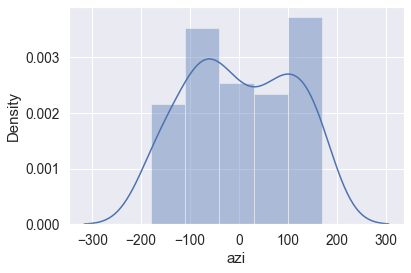

In [40]:
import seaborn as sns

sns.distplot(df_train['azi']);

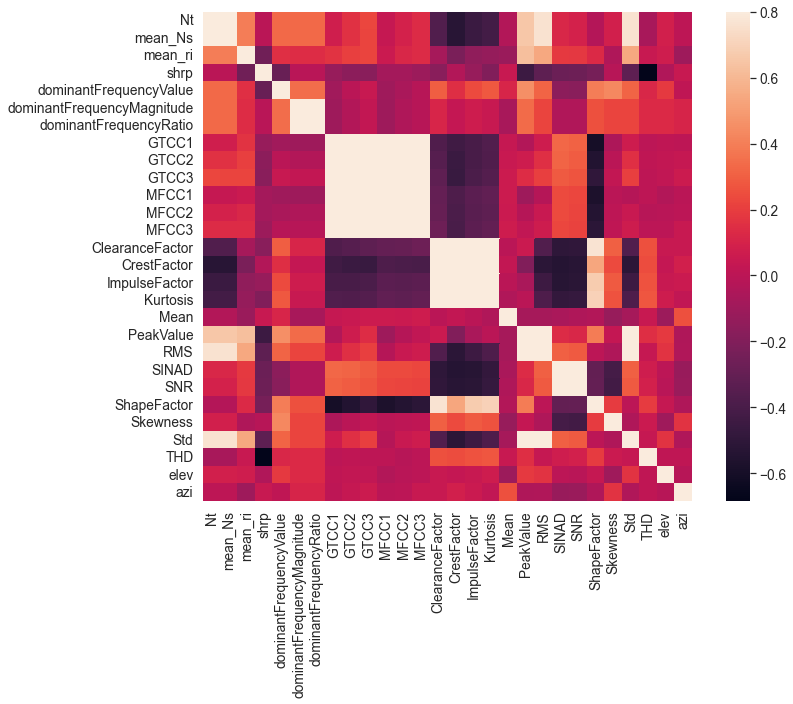

In [41]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

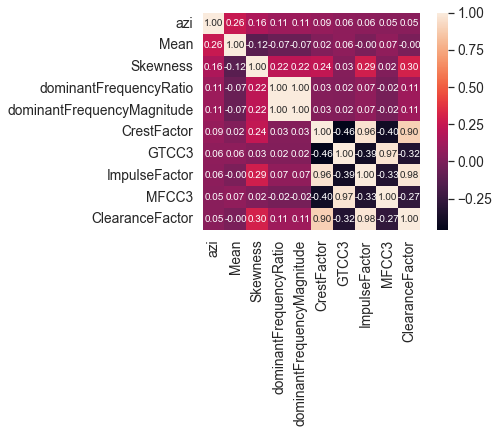

In [42]:
#azi correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'azi')['azi'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Conclusion: The features are not linearly correlated neither with azi nor with elevation

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


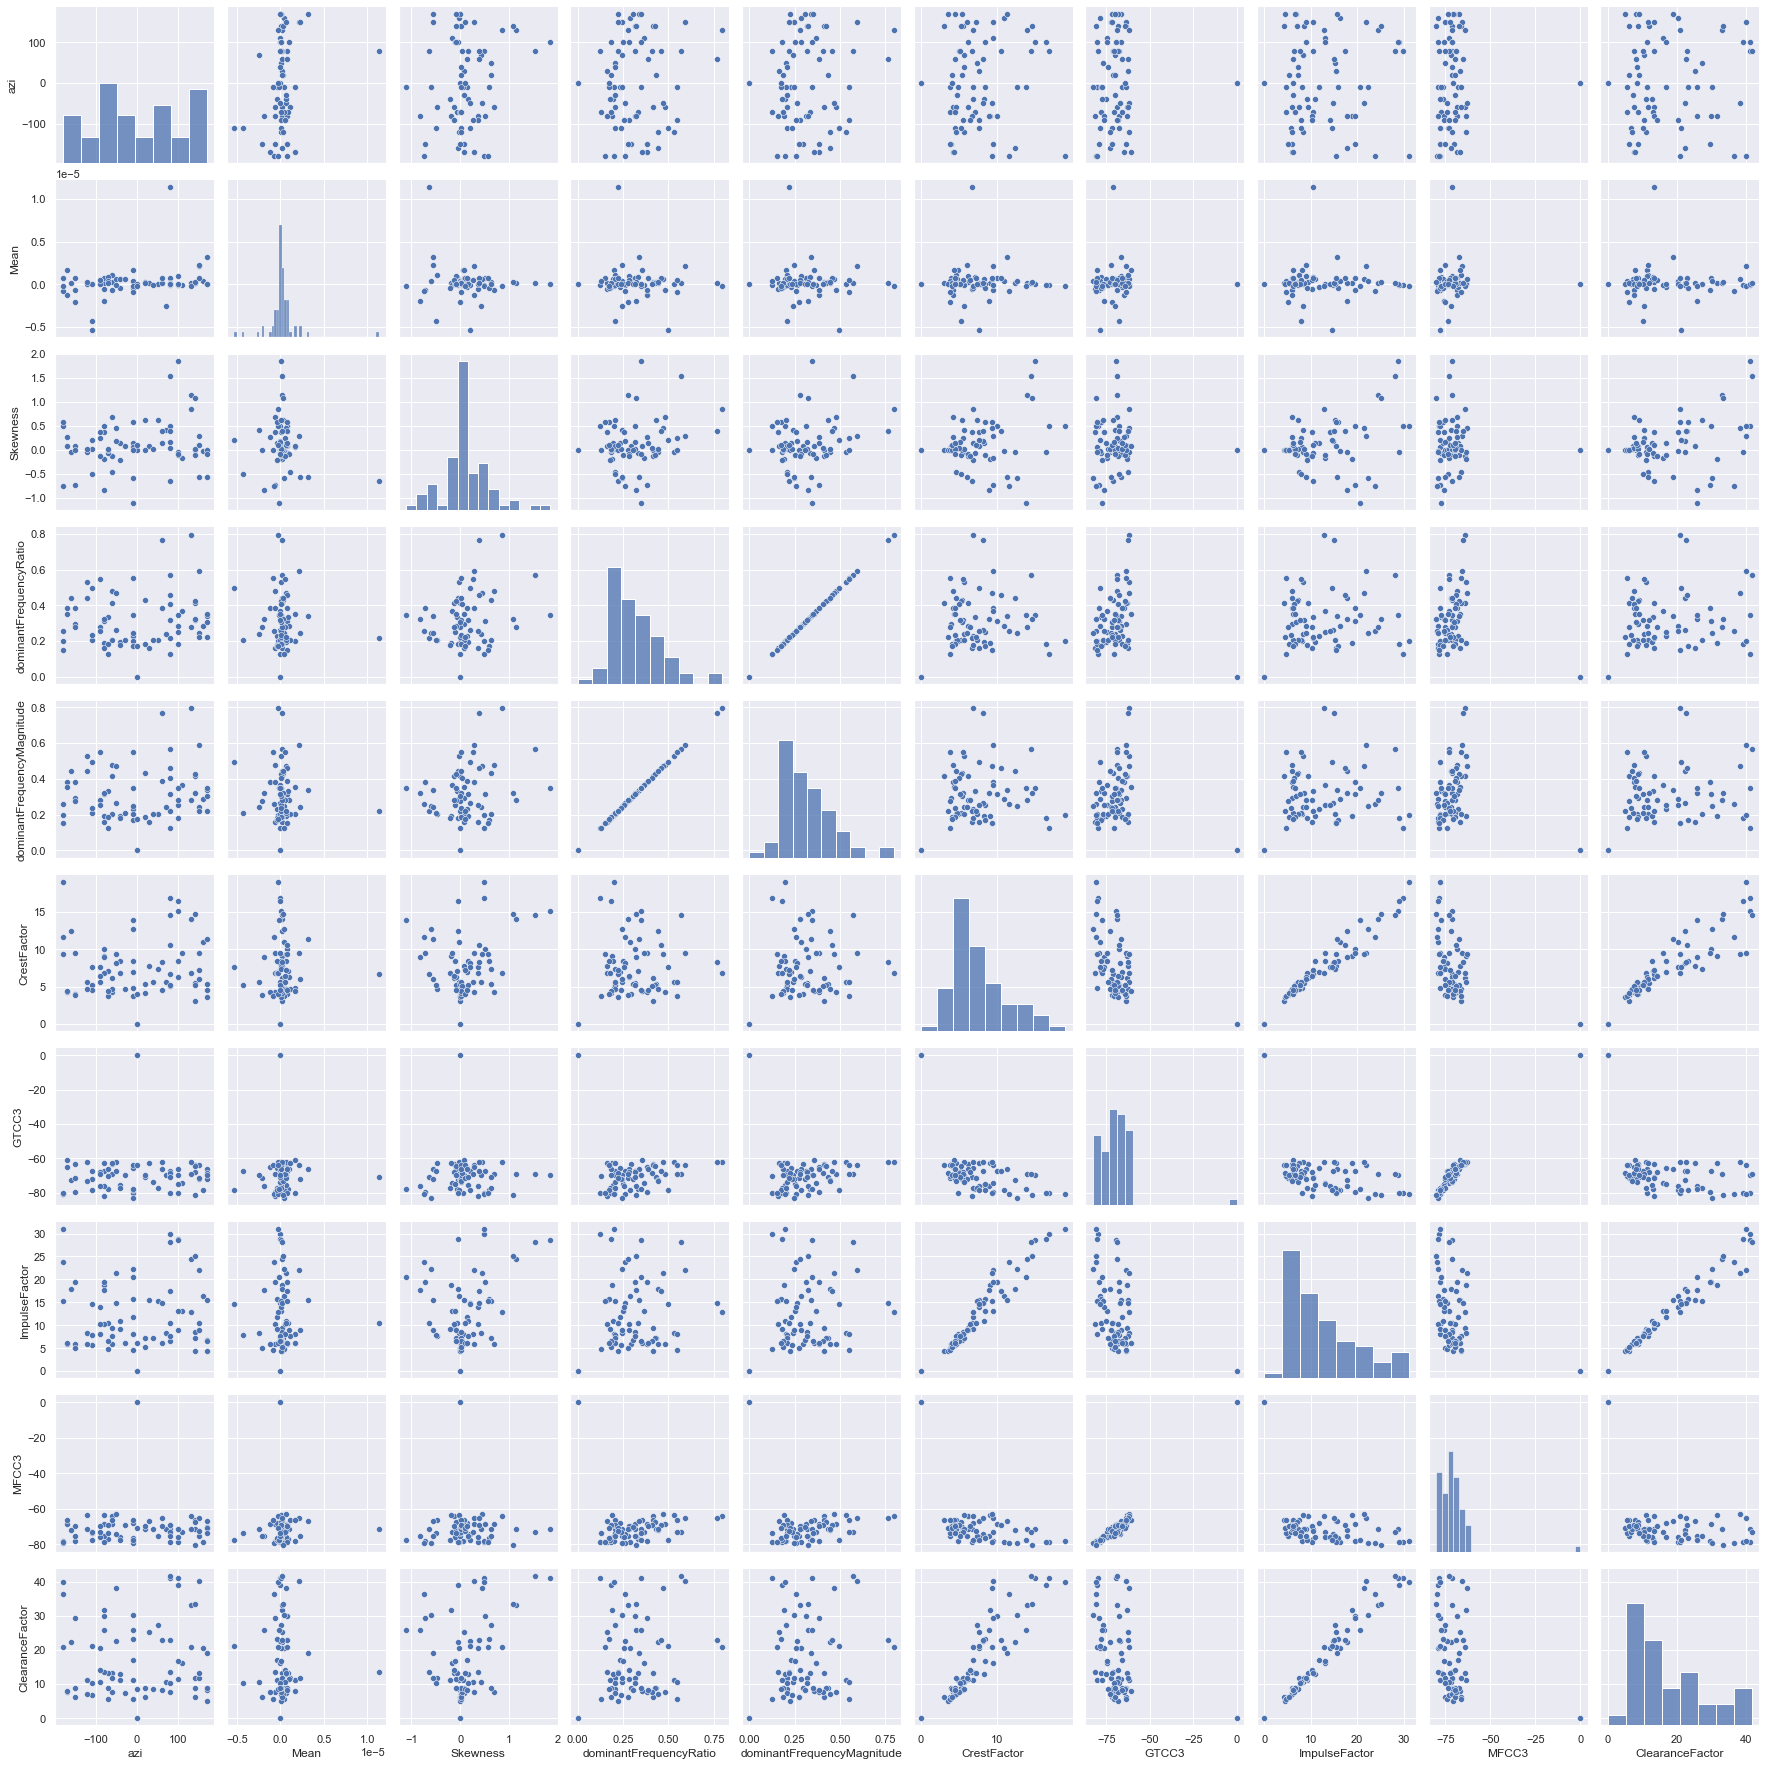

In [43]:
#scatterplot
sns.set()
cols = ['azi', 'Mean', 'Skewness', 'dominantFrequencyRatio', 'dominantFrequencyMagnitude', 'CrestFactor', 'GTCC3', 'ImpulseFactor', 'MFCC3', 'ClearanceFactor']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Final conclusion: no material for modelling with hand picked features above.